# Vietnam Country

In [1]:
import pandas as pd
from pathlib import Path
import datetime

import math
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
menhap_df = pd.read_excel("D:/PENS/Semester_4/Data Mining/PBL_Datamining/final_data.xlsx")
menhap_df

,country,year,Schizophrenia,Bipolar,Eating_Disorders,Anxiety,Drug_Use,Depression,Alcohol_Use,Life_Ladder,Log_GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Generosity,Corruption,Positive_Affect,Negative_Affect,Ladder_Std_Dev,GINI_Index
0,Brunei,1990,0.274544,0.617719,0.550731,3.548453,0.911231,2.577977,0.771017,6.233732,10.826301,0.790585,70.994705,0.767580,0.073472,0.062403,0.569497,0.166263,2.052102,0.622453
1,Brunei,1991,0.273819,0.618347,0.548010,3.554565,0.910156,2.562828,0.770862,6.437663,11.145486,0.793567,73.141360,0.789073,0.054550,0.226984,0.550824,0.112444,2.006036,0.584078
2,Brunei,1992,0.273212,0.618986,0.545544,3.561621,0.910287,2.551382,0.770430,6.586561,10.776199,0.823234,73.563922,0.787172,0.043634,0.148619,0.712836,0.185052,2.053332,0.560275
3,Brunei,1993,0.272736,0.619673,0.543644,3.569155,0.910409,2.543804,0.769584,6.821280,11.119712,0.811811,71.970894,0.801130,0.071169,0.054491,0.472039,0.127140,2.031076,0.612157
4,Brunei,1994,0.272383,0.620342,0.542626,3.576319,0.908915,2.538465,0.768343,6.192638,10.400065,0.752147,73.270498,0.705897,0.086336,0.107812,0.650715,0.138546,2.073008,0.559053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,Vietnam,2013,0.241026,0.550479,0.119353,2.039645,0.673579,2.884934,1.722689,5.022699,8.541249,0.759477,65.545815,0.919607,-0.024637,0.771246,0.718431,0.165225,1.404304,0.381849
304,Vietnam,2014,0.241883,0.551005,0.121583,2.045305,0.677829,2.882767,1.728448,5.084923,8.588622,0.792168,65.677925,0.845240,0.002126,0.779896,0.701386,0.240607,1.769163,0.414816
305,Vietnam,2015,0.242783,0.551548,0.123609,2.051937,0.682933,2.881750,1.733233,5.076315,8.642591,0.848677,65.810028,0.897333,0.087220,0.747188,0.642237,0.232416,1.794858,0.398138
306,Vietnam,2016,0.243709,0.552084,0.126256,2.059037,0.687896,2.879813,1.736929,5.062267,8.692120,0.876324,65.942139,0.894351,-0.088430,0.799240,0.536226,0.222550,1.767819,0.375812


In [3]:
menhap_df.dtypes

country                object
year                    int64
Schizophrenia         float64
Bipolar               float64
Eating_Disorders      float64
Anxiety               float64
Drug_Use              float64
Depression            float64
Alcohol_Use           float64
Life_Ladder           float64
Log_GDP_per_Capita    float64
Social_Support        float64
Life_Expectancy       float64
Freedom               float64
Generosity            float64
Corruption            float64
Positive_Affect       float64
Negative_Affect       float64
Ladder_Std_Dev        float64
GINI_Index            float64
dtype: object

In [4]:
lifeladder_df = menhap_df.loc[:, ["year", 'country', 'Life_Ladder']]
lifeladder_df

,year,country,Life_Ladder
0,1990,Brunei,6.233732
1,1991,Brunei,6.437663
2,1992,Brunei,6.586561
3,1993,Brunei,6.821280
4,1994,Brunei,6.192638
...,...,...,...
303,2013,Vietnam,5.022699
304,2014,Vietnam,5.084923
305,2015,Vietnam,5.076315
306,2016,Vietnam,5.062267


In [5]:
# Mengambil data untuk country tertentu
vietnam_df = lifeladder_df.loc[lifeladder_df['country'] == 'Vietnam']
vietnam_df['year'] = pd.to_datetime(vietnam_df['year'], format='%Y')
vietnam_df = pd.Series(vietnam_df['Life_Ladder'].values, index=vietnam_df.year, name='Life_Ladder')
vietnam_df.index = pd.DatetimeIndex(vietnam_df.index, 
                                      freq=vietnam_df.index.inferred_freq)

vietnam_df

C:\Users\DELL\AppData\Local\Temp\ipykernel_8380\1495057628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnam_df['year'] = pd.to_datetime(vietnam_df['year'], format='%Y')


year
1990-01-01    5.440211
1991-01-01    5.576322
1992-01-01    5.680986
1993-01-01    5.278326
1994-01-01    5.140510
1995-01-01    5.687357
1996-01-01    5.334591
1997-01-01    5.688824
1998-01-01    5.635148
1999-01-01    5.084345
2000-01-01    5.333472
2001-01-01    5.548544
2002-01-01    5.267465
2003-01-01    5.117334
2004-01-01    5.472865
2005-01-01    5.636762
2006-01-01    5.293660
2007-01-01    5.421688
2008-01-01    5.480425
2009-01-01    5.304265
2010-01-01    5.295781
2011-01-01    5.767344
2012-01-01    5.534570
2013-01-01    5.022699
2014-01-01    5.084923
2015-01-01    5.076315
2016-01-01    5.062267
2017-01-01    5.380992
Freq: AS-JAN, Name: Life_Ladder, dtype: float64

In [6]:
vietnam_list = vietnam_df.tolist()
vietnam_list

[5.440210711758845,
 5.576322045972887,
 5.680985583578252,
 5.27832629659481,
 5.140509617312931,
 5.687357144586183,
 5.334591108417109,
 5.688823789672925,
 5.635148084911616,
 5.084344512439767,
 5.333472440484347,
 5.548543788600395,
 5.267465223199398,
 5.117334393082682,
 5.472864730023078,
 5.63676175069863,
 5.293659687042236,
 5.421687602996826,
 5.480425357818604,
 5.304264545440674,
 5.295780658721924,
 5.76734447479248,
 5.53456974029541,
 5.022698879241943,
 5.084923267364502,
 5.076315402984619,
 5.062267303466797,
 5.380992499462205]

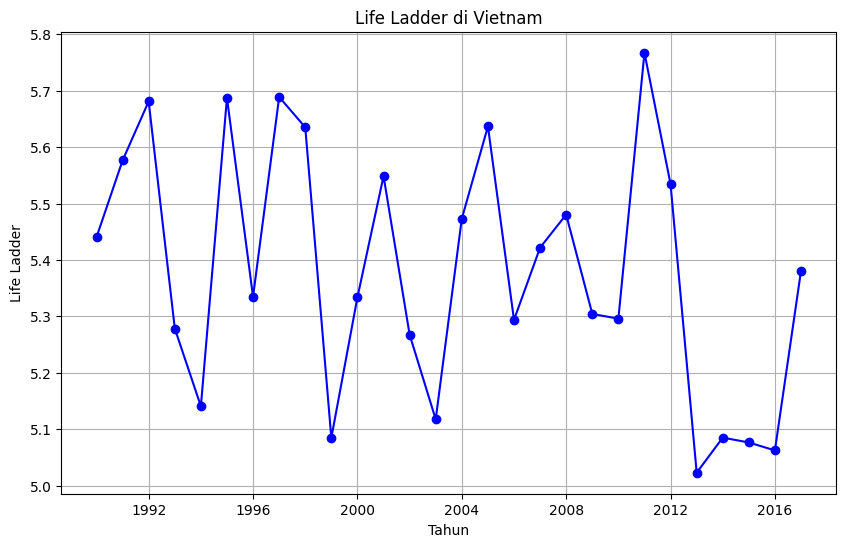

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(vietnam_df.index, vietnam_list, marker='o', linestyle='-', color='b')
plt.title('Life Ladder di Vietnam')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.grid(True)
plt.show()

### model SES

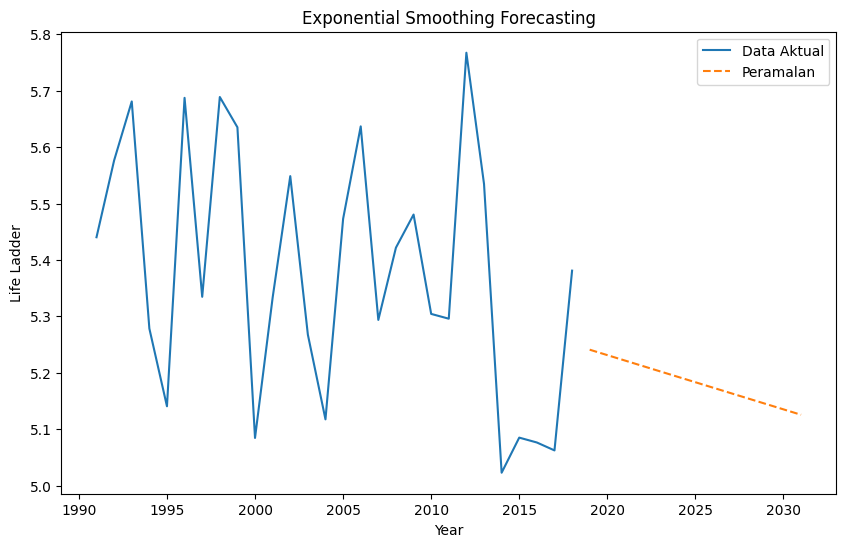

            forecast
2018-12-31  5.240834
2019-12-31  5.231217
2020-12-31  5.221599
2021-12-31  5.211982
2022-12-31  5.202364
2023-12-31  5.192747
2024-12-31  5.183130
2025-12-31  5.173512
2026-12-31  5.163895
2027-12-31  5.154278
2028-12-31  5.144660
2029-12-31  5.135043
2030-12-31  5.125426


In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(vietnam_list), freq='Y')
life_ladder_series = pd.Series(vietnam_list, index=years)

# Buat model Exponential Smoothing
model = ExponentialSmoothing(life_ladder_series, trend='add', seasonal=None, seasonal_periods=None)
fit = model.fit()

# Buat prediksi untuk beberapa tahun ke depan
forecast_steps = 13
forecast = fit.forecast(steps=forecast_steps)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(forecast, label='Peramalan', linestyle='--')
plt.legend(loc='best')
plt.title('Exponential Smoothing Forecasting')
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.show()

# Tampilkan DataFrame hasil peramalan
forecast_years = pd.date_range(start=years[-1] + pd.offsets.YearBegin(), periods=forecast_steps, freq='Y')
forecast_df = pd.DataFrame({'forecast': forecast})

print(forecast_df)


### Moving Average

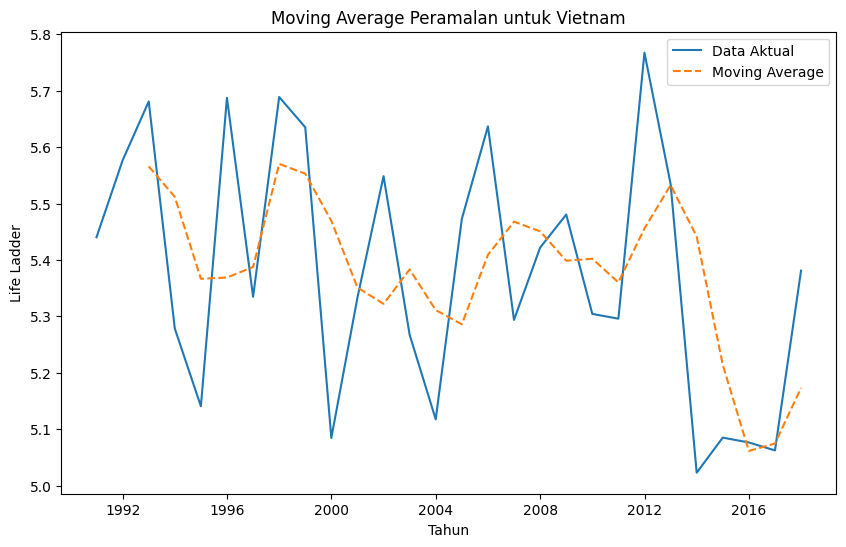

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(vietnam_list), freq='Y')
life_ladder_series = pd.Series(vietnam_list, index=years)

# Hitung Moving Average (misalnya dengan jendela waktu 3 tahun)
window_size = 3
moving_average = life_ladder_series.rolling(window=window_size).mean()

# Plot hasilnya
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(moving_average, label='Moving Average', linestyle='--')
plt.legend(loc='best')
plt.title('Moving Average Peramalan untuk Vietnam')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.show()

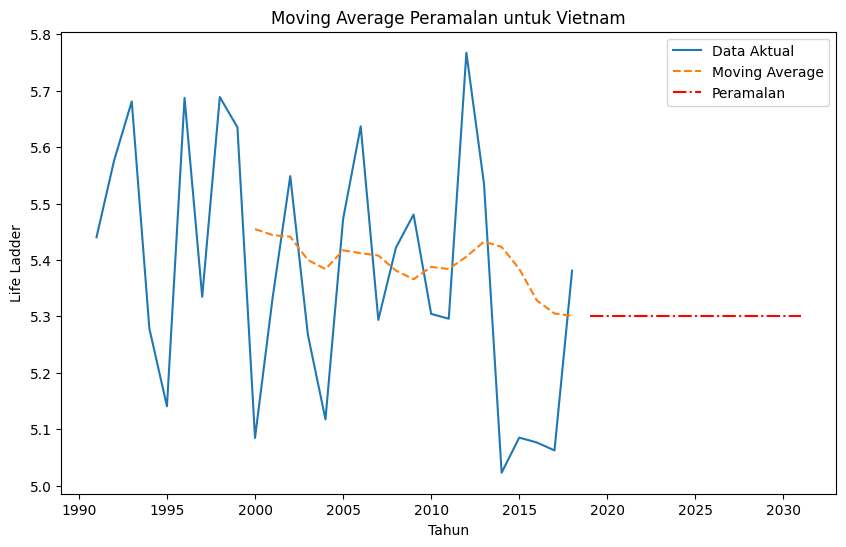

            forecast
year                
2018-12-31  5.300958
2019-12-31  5.300958
2020-12-31  5.300958
2021-12-31  5.300958
2022-12-31  5.300958
2023-12-31  5.300958
2024-12-31  5.300958
2025-12-31  5.300958
2026-12-31  5.300958
2027-12-31  5.300958
2028-12-31  5.300958
2029-12-31  5.300958
2030-12-31  5.300958


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(vietnam_list), freq='Y')
life_ladder_series = pd.Series(vietnam_list, index=years)

# Hitung Moving Average (misalnya dengan jendela waktu 10 tahun)
window_size = 10
moving_average = life_ladder_series.rolling(window=window_size).mean()

# Prediksi 10 tahun ke depan
last_moving_avg = moving_average.iloc[-1]
forecast_years = pd.date_range(start=life_ladder_series.index[-1] + pd.DateOffset(years=1), periods=13, freq='Y')
forecast_values = np.full(13, last_moving_avg)

# Buat DataFrame untuk prediksi
forecast_ma = pd.DataFrame({'year': forecast_years, 'forecast': forecast_values})
forecast_ma.set_index('year', inplace=True)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(moving_average, label='Moving Average', linestyle='--')
plt.plot(forecast_ma, label='Peramalan', linestyle='-.', color='red')
plt.legend(loc='best')
plt.title('Moving Average Peramalan untuk Vietnam')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.show()

# Tampilkan DataFrame hasil peramalan
print(forecast_ma)

### linear regresion

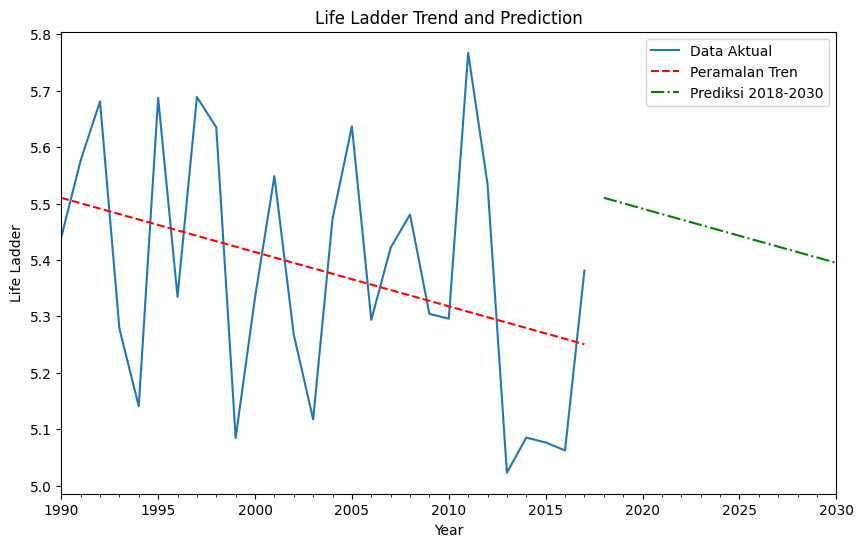

2018-12-31    5.510119
2019-12-31    5.500502
2020-12-31    5.490885
2021-12-31    5.481267
2022-12-31    5.471650
2023-12-31    5.462033
2024-12-31    5.452415
2025-12-31    5.442798
2026-12-31    5.433181
2027-12-31    5.423563
2028-12-31    5.413946
2029-12-31    5.404329
2030-12-31    5.394711
Freq: A-DEC, dtype: float64


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa import tsatools

# Membuat data Life Ladder dari daftar yang ada
years = pd.date_range(start='1990', periods=len(vietnam_list), freq='Y')
life_ladder_series = pd.Series(vietnam_list, index=years, name='Life_Ladder')

# Menambahkan tren
vietnam_df = tsatools.add_trend(life_ladder_series, trend='ct')

# Membangun model regresi linear
vietnam_lm = sm.OLS(vietnam_df['Life_Ladder'], vietnam_df[['trend', 'const']]).fit()

# Membuat data untuk prediksi dari 2018 sampai 2030
forecast_years = pd.date_range(start='2018', end='2031', freq='Y')
forecast_df = pd.DataFrame(index=forecast_years)
forecast_df = tsatools.add_trend(forecast_df, trend='ct')

# Membuat prediksi
forecast_values = vietnam_lm.predict(forecast_df[['trend', 'const']])

# Plot hasil
plt.figure(figsize=(10, 6))
ax = life_ladder_series.plot(title='Life Ladder Trend and Prediction')
vietnam_lm.predict(vietnam_df[['trend', 'const']]).plot(ax=ax, linestyle='--', color='red')
forecast_values.plot(ax=ax, linestyle='-.', color='green')
ax.set_xlabel('Year')
ax.set_ylabel('Life Ladder')
plt.legend(['Data Aktual', 'Peramalan Tren', 'Prediksi 2018-2030'])
plt.show()

# Menampilkan prediksi
print(forecast_values)


### ARIMA

Forecast for Vietnam's Life Ladder (2018-2030):
            forecast
2018-12-31  5.338126
2019-12-31  5.331521
2020-12-31  5.330503
2021-12-31  5.330346
2022-12-31  5.330322
2023-12-31  5.330319
2024-12-31  5.330318
2025-12-31  5.330318
2026-12-31  5.330318
2027-12-31  5.330318
2028-12-31  5.330318
2029-12-31  5.330318
2030-12-31  5.330318


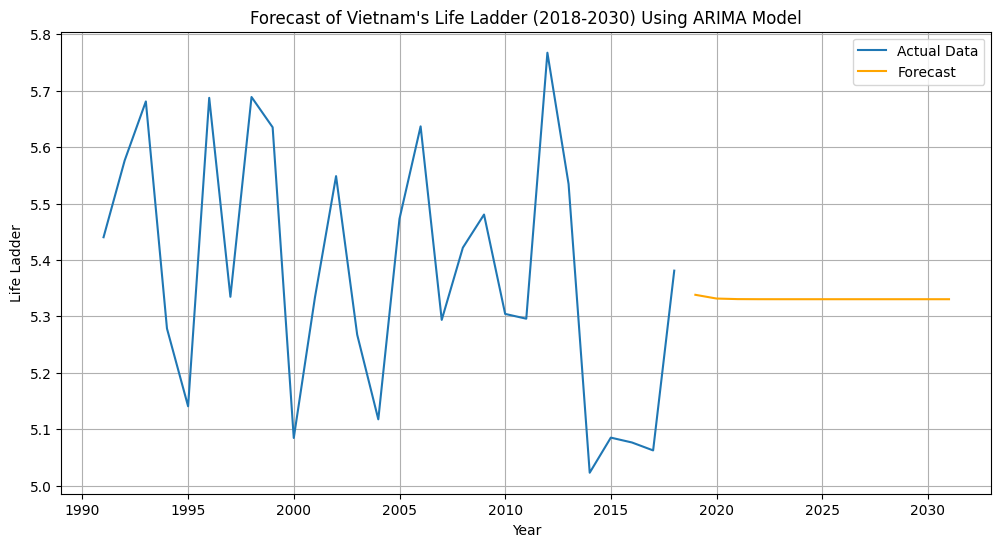

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Konversi life_ladder_list menjadi Series dengan index tahun
years = pd.date_range(start='1990', periods=len(vietnam_list), freq='Y')
life_ladder_series = pd.Series(vietnam_list, index=years)

# Misalkan model ARIMA yang sudah kita latih sebelumnya adalah ARIMA(1,1,1)
model = ARIMA(life_ladder_series, order=(1, 1, 1))
model_fit = model.fit()

# Melakukan peramalan untuk 14 tahun ke depan (dari tahun 2018 hingga 2030)
forecast = model_fit.forecast(steps=13)

# Tampilkan hasil peramalan
print("Forecast for Vietnam's Life Ladder (2018-2030):")
forecast_years = pd.date_range(start='2018-01-01', periods=13, freq='Y')
forecast_arima = pd.DataFrame({'forecast': forecast})
print(forecast_arima)

# Visualisasikan hasil peramalan
plt.figure(figsize=(12, 6))
plt.plot(life_ladder_series, label='Actual Data')
plt.plot(forecast, label='Forecast', color='orange')
plt.title("Forecast of Vietnam's Life Ladder (2018-2030) Using ARIMA Model")
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.legend()
plt.grid(True)
plt.show()

forecast_arima.to_excel("D:/PENS/Semester_4/Data Mining/PBL_Datamining/hasil_forecast/vietnam_for_arima.xlsx", index=False)


## Evaluation Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Buat DataFrame baru dengan life_ladder_list dan tahun sebagai indeks
vietnam_df_new = pd.DataFrame({'Life_Ladder': vietnam_list}, index=years)

# Bagi data menjadi set pelatihan dan pengujian (70:30)
X = vietnam_df_new.index.year.values.reshape(-1, 1)  # Ambil tahun dari indeks DataFrame
y = vietnam_df_new['Life_Ladder'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Regresi Linier
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
forecast_lr = model_lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, forecast_lr)
mape_lr = np.mean(np.abs((y_test - forecast_lr) / y_test)) * 100
rmse_lr = np.sqrt(mean_squared_error(y_test, forecast_lr))


In [14]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi set pelatihan dan pengujian (70:30)
X = life_ladder_series.index.to_numpy().reshape(-1, 1)  # Menggunakan tahun sebagai fitur
y = life_ladder_series.values  # Life Ladder sebagai target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model SES
model_ses = ExponentialSmoothing(y_train, trend='add', seasonal=None, seasonal_periods=None)
fit_ses = model_ses.fit()
forecast_ses = fit_ses.forecast(steps=len(X_test))
mae_ses = mean_absolute_error(y_test, forecast_ses)
mape_ses = np.mean(np.abs((y_test - forecast_ses) / y_test)) * 100
rmse_ses = np.sqrt(mean_squared_error(y_test, forecast_ses))

# Model ARIMA
model_arima = ARIMA(y_train, order=(1, 1, 1))
model_fit_arima = model_arima.fit()
forecast_arima = model_fit_arima.forecast(steps=len(X_test))
mae_arima = mean_absolute_error(y_test, forecast_arima)
mape_arima = np.mean(np.abs((y_test - forecast_arima) / y_test)) * 100
rmse_arima = np.sqrt(mean_squared_error(y_test, forecast_arima))

# Model MA
window_size = 3
vietnam_df['Moving Average'] = vietnam_df['Life_Ladder'].rolling(window=window_size, min_periods=1).mean()
actual_data = vietnam_df['Life_Ladder']
ma_forecast = vietnam_df['Moving Average']
mae_ma = mean_absolute_error(actual_data, ma_forecast)
mape_ma = np.mean(np.abs((actual_data - ma_forecast) / actual_data)) * 100
rmse_ma = np.sqrt(mean_squared_error(actual_data, ma_forecast))


In [15]:
print(forecast_lr)
print(forecast_ses)
print(forecast_arima)
print(ma_forecast.tail(20))

[5.41883373 5.2070328  5.43207129 5.25998304 5.53797175 5.37912105
 5.31293327 5.24674548 5.39235861]
[5.34720898 5.34576384 5.34431869 5.34287355 5.34142841 5.33998327
 5.33853813 5.33709299 5.33564785]
[5.35716625 5.3596513  5.35992485 5.35995496 5.35995828 5.35995864
 5.35995868 5.35995869 5.35995869]
1998-12-31    5.552854
1999-12-31    5.469439
2000-12-31    5.350988
2001-12-31    5.322120
2002-12-31    5.383160
2003-12-31    5.311114
2004-12-31    5.285888
2005-12-31    5.408987
2006-12-31    5.467762
2007-12-31    5.450703
2008-12-31    5.398591
2009-12-31    5.402126
2010-12-31    5.360157
2011-12-31    5.455797
2012-12-31    5.532565
2013-12-31    5.441538
2014-12-31    5.214064
2015-12-31    5.061313
2016-12-31    5.074502
2017-12-31    5.173192
Freq: A-DEC, Name: Moving Average, dtype: float64


In [16]:
# Buat DataFrame untuk menyimpan hasil evaluasi
eval_metrics = pd.DataFrame({
    'Model': ['SES','Linier Regresion', 'Moving Average', 'ARIMA'],
    'MAE': [mae_ses,mae_lr, mae_ma, mae_arima],
    'MAPE (%)': [mape_ses, mape_lr, mape_ma, mape_arima],
    'RMSE': [rmse_ses, rmse_lr, rmse_ma, rmse_arima]
})

# Tampilkan DataFrame evaluasi
print("Evaluation Metrics:")
print(eval_metrics)

Evaluation Metrics:
              Model       MAE  MAPE (%)      RMSE
0               SES  0.212493  3.903344  0.238679
1  Linier Regresion  0.215314  3.943640  0.251377
2    Moving Average  0.146866  2.740221  0.186189
3             ARIMA  0.204049  3.757625  0.231249


In [17]:
print(vietnam_list)

[5.440210711758845, 5.576322045972887, 5.680985583578252, 5.27832629659481, 5.140509617312931, 5.687357144586183, 5.334591108417109, 5.688823789672925, 5.635148084911616, 5.084344512439767, 5.333472440484347, 5.548543788600395, 5.267465223199398, 5.117334393082682, 5.472864730023078, 5.63676175069863, 5.293659687042236, 5.421687602996826, 5.480425357818604, 5.304264545440674, 5.295780658721924, 5.76734447479248, 5.53456974029541, 5.022698879241943, 5.084923267364502, 5.076315402984619, 5.062267303466797, 5.380992499462205]


In [18]:

# Data aktual dan prediksi dari masing-masing model
actual_values = [5.304264545440674, 5.295780658721924, 5.76734447479248, 5.53456974029541, 5.022698879241943, 5.084923267364502, 5.076315402984619, 5.062267303466797, 5.380992499462205]
ses_forecast = [5.34720898, 5.34576384, 5.34431869, 5.34287355, 5.34142841, 5.33998327, 5.33853813, 5.33709299, 5.33564785]
ma_forecast = [5.402126, 5.360157, 5.455797, 5.532565, 5.441538, 5.214064, 5.061313, 5.074502, 5.173192]
lr_forecast = [5.41883373, 5.2070328, 5.43207129, 5.25998304, 5.53797175, 5.37912105, 5.31293327, 5.24674548, 5.39235861]
arima_forecast = [5.35716625, 5.3596513, 5.35992485, 5.35995496, 5.35995828, 5.35995864, 5.35995868, 5.35995869, 5.35995869]

# Tanggal mulai dan akhir
start_date = '2009-01-01'
end_date = '2018-01-01'

# Buat range tanggal dari start_date hingga end_date
date_range = pd.date_range(start=start_date, end=end_date, freq='Y')

# Buat DataFrame untuk tabel prediksi dengan kolom tahun
predictions_table = pd.DataFrame({
    'Year': date_range,
    'Actual': actual_values,
    'SES Forecast': forecast_ses,
    'Linier Regresion Forecast' : forecast_lr,
    'MA Forecast': ma_forecast,
    'ARIMA Forecast': forecast_arima
})
# Menampilkan tabel hasil prediksi
print("Hasil Prediksi:")
predictions_table

Hasil Prediksi:


,Year,Actual,SES Forecast,Linier Regresion Forecast,MA Forecast,ARIMA Forecast
0,2009-12-31,5.304265,5.347209,5.418834,5.402126,5.357166
1,2010-12-31,5.295781,5.345764,5.207033,5.360157,5.359651
2,2011-12-31,5.767344,5.344319,5.432071,5.455797,5.359925
3,2012-12-31,5.534570,5.342874,5.259983,5.532565,5.359955
4,2013-12-31,5.022699,5.341428,5.537972,5.441538,5.359958
5,2014-12-31,5.084923,5.339983,5.379121,5.214064,5.359959
6,2015-12-31,5.076315,5.338538,5.312933,5.061313,5.359959
7,2016-12-31,5.062267,5.337093,5.246745,5.074502,5.359959
8,2017-12-31,5.380992,5.335648,5.392359,5.173192,5.359959
